<a href="https://colab.research.google.com/github/nabilaekasd/bil-bookstore/blob/main/prediksi_kinerja_ESG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/college/big_data/Company_ESG_Financial_Dataset.csv"
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


In [ ]:
# ukuran dataset
df.shape

# tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [ ]:
df.isnull().sum()

,0
CompanyID,0
CompanyName,0
Industry,0
Region,0
Year,0
Revenue,0
ProfitMargin,0
MarketCap,0
GrowthRate,1000
ESG_Overall,0


In [ ]:
# Hitung jumlah missing value per perusahaan
missing_per_company = df[df['GrowthRate'].isnull()].groupby('CompanyName').size().sort_values(ascending=False)

# Tampilkan 10 perusahaan dengan missing value terbanyak
print(missing_per_company.head(10))

CompanyName
Company_999     1
Company_1       1
Company_10      1
Company_100     1
Company_1000    1
Company_101     1
Company_102     1
Company_103     1
Company_984     1
Company_983     1
dtype: int64


In [ ]:
# Hitung jumlah missing value per industri
missing_per_industry = df[df['GrowthRate'].isnull()].groupby('Industry').size().sort_values(ascending=False)

# Tampilkan semua industri dengan jumlah missing value
print(missing_per_industry)

Industry
Healthcare        121
Transportation    117
Manufacturing     117
Consumer Goods    116
Finance           113
Energy            108
Utilities         107
Retail            106
Technology         95
dtype: int64


In [ ]:
#Imputasi NaN kolom GrowthRate dengan nilai rata-rata
df['GrowthRate'] = df['GrowthRate'].fillna(df['GrowthRate'].mean())

In [ ]:
# statistik ringkasan variabel numerik
df.describe()

# statistik variabel kategorikal
df.describe(include='object')

,CompanyName,Industry,Region
count,11000,11000,11000
unique,1000,9,7
top,Company_1000,Healthcare,Asia
freq,11,1331,1672


In [ ]:
# Cek kategori unik pada Industry dan Region
print(df['Industry'].unique())
print(df['Region'].unique())

['Retail' 'Transportation' 'Technology' 'Finance' 'Healthcare' 'Energy'
 'Consumer Goods' 'Utilities' 'Manufacturing']
['Latin America' 'Asia' 'Africa' 'Middle East' 'Oceania' 'Europe'
 'North America']


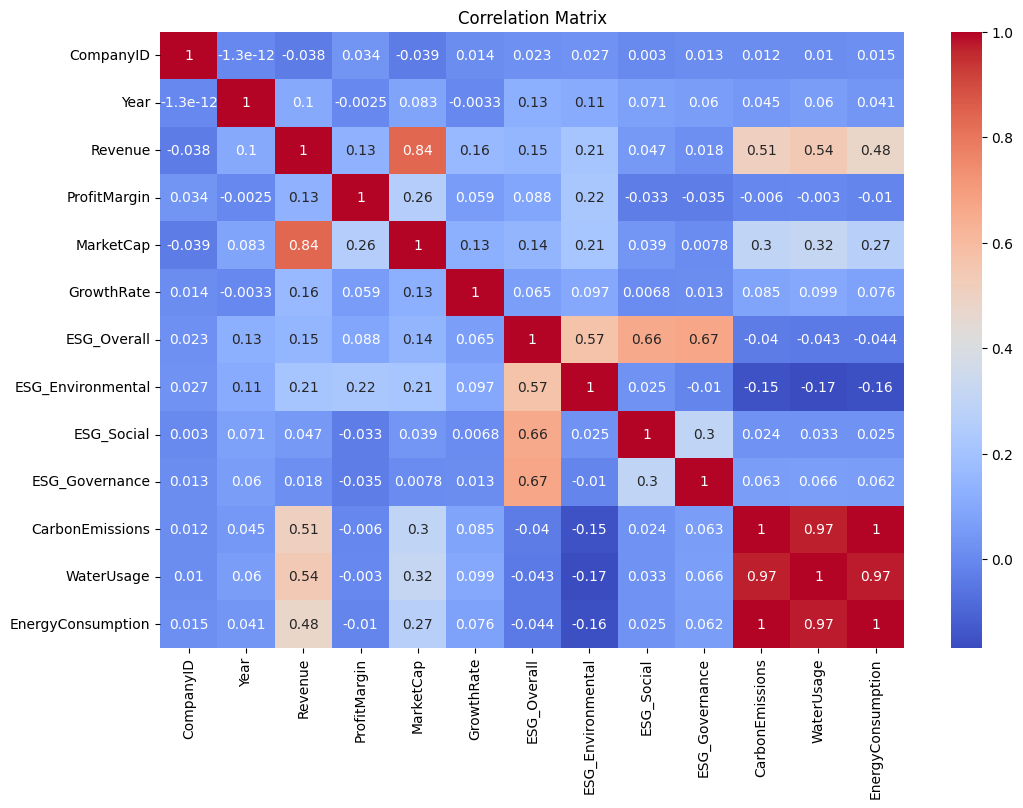

In [ ]:
# Analisis korelasi awal

import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

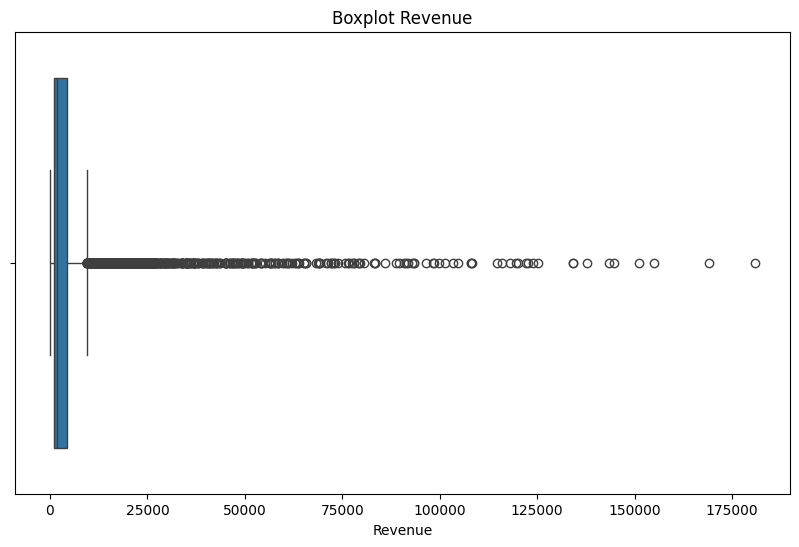

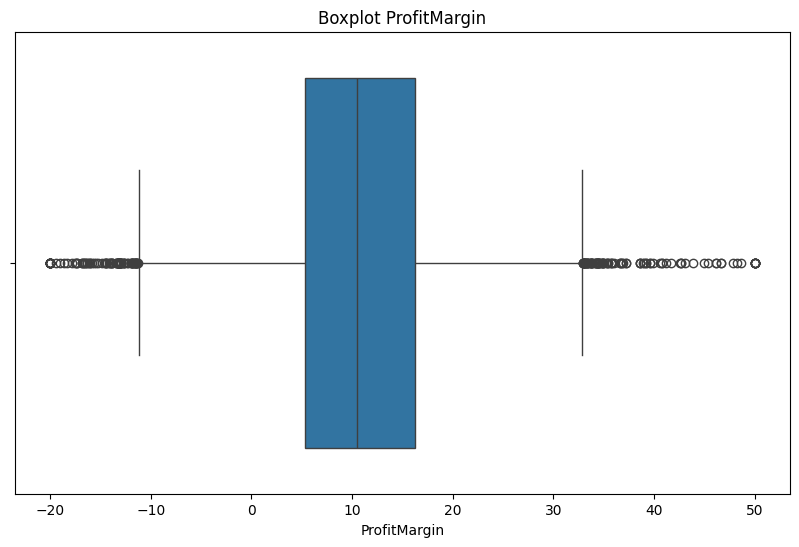

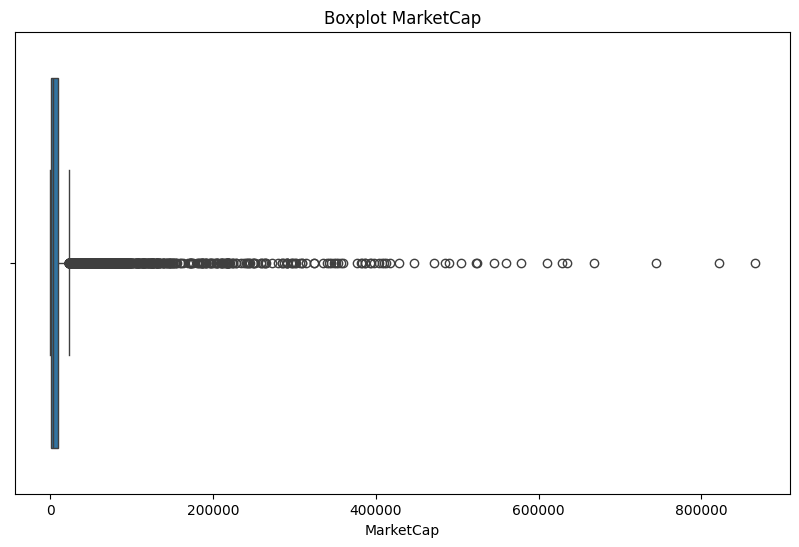

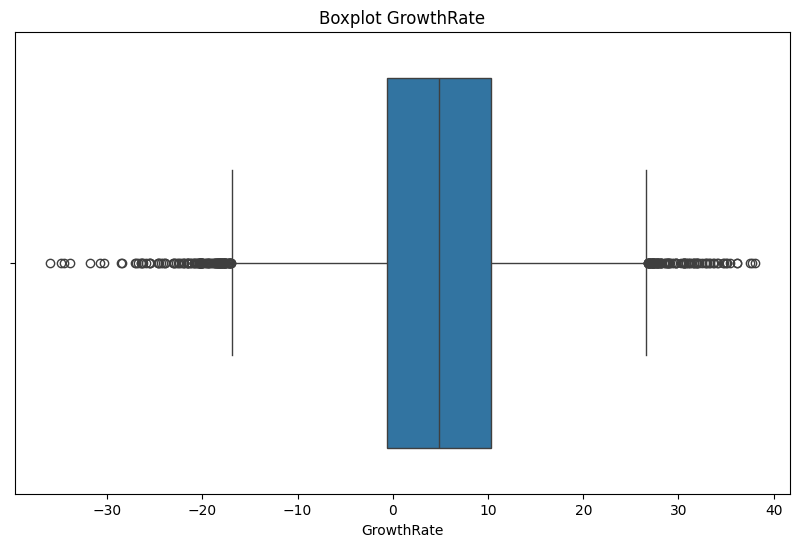

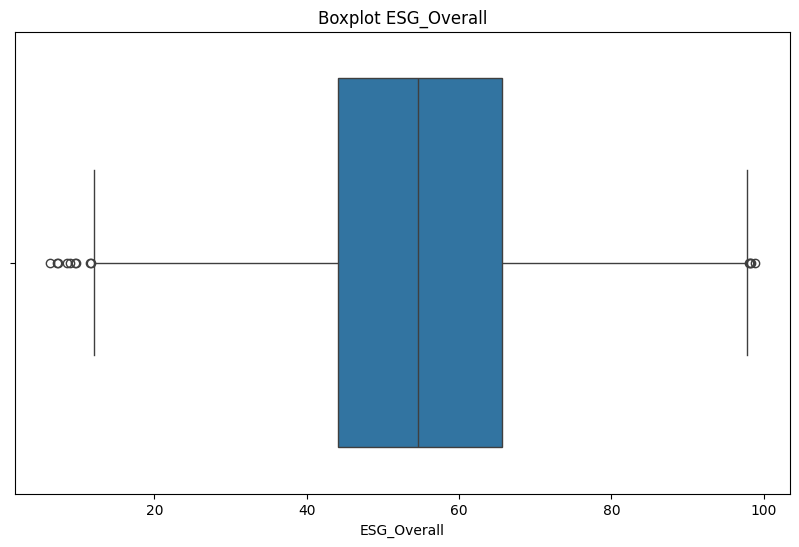

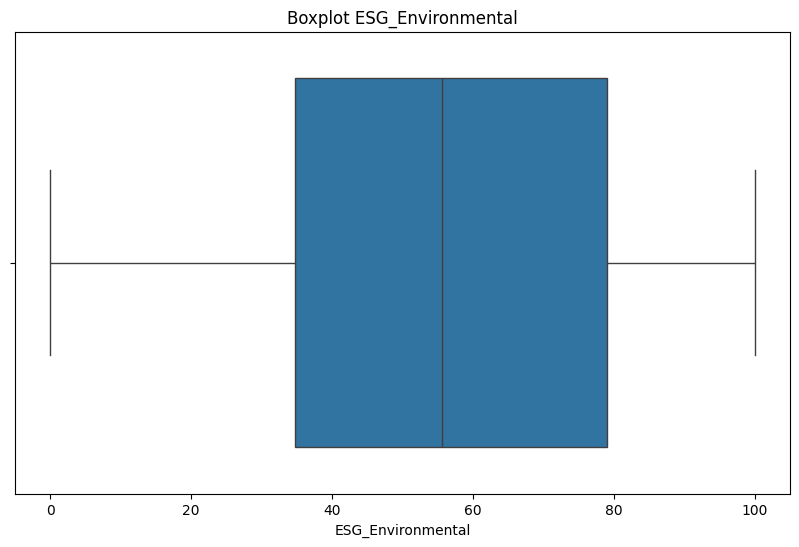

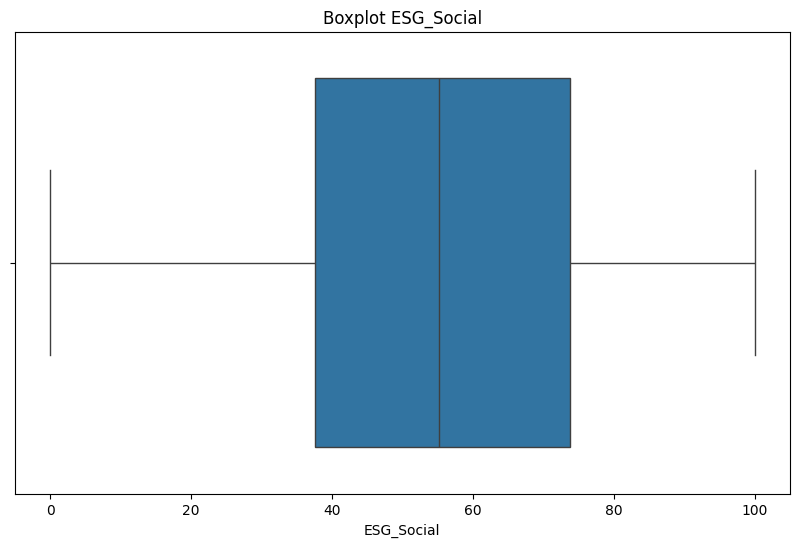

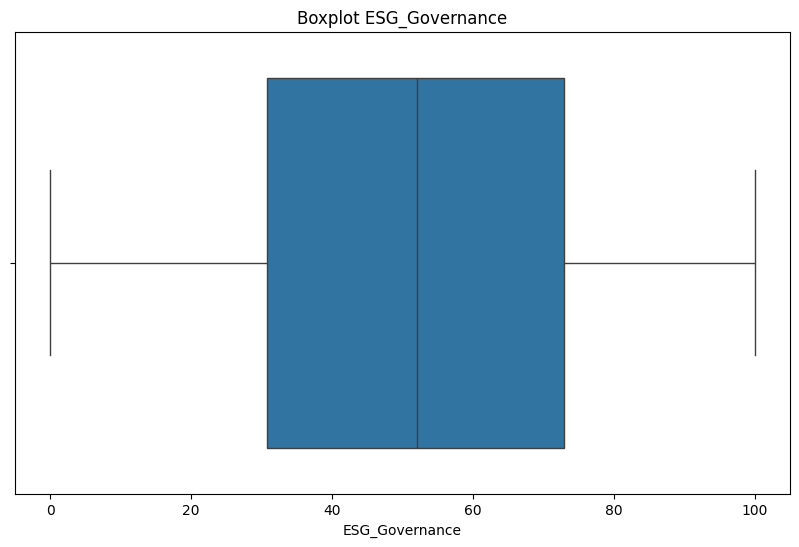

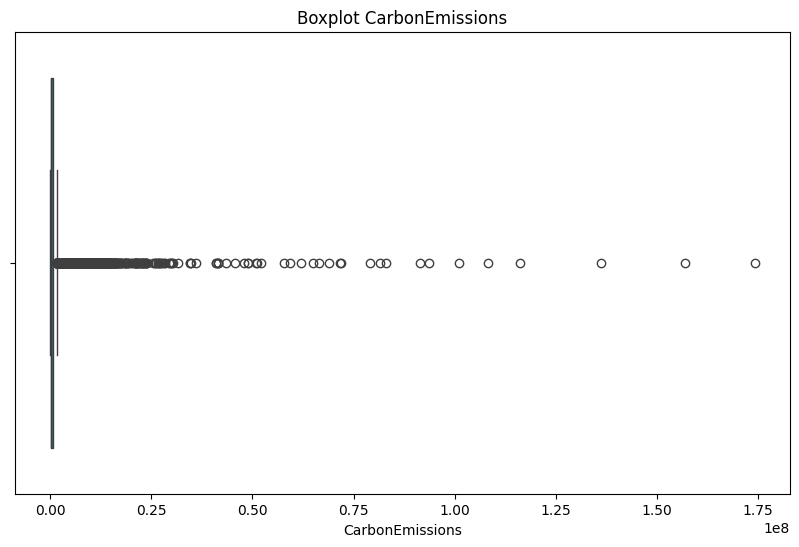

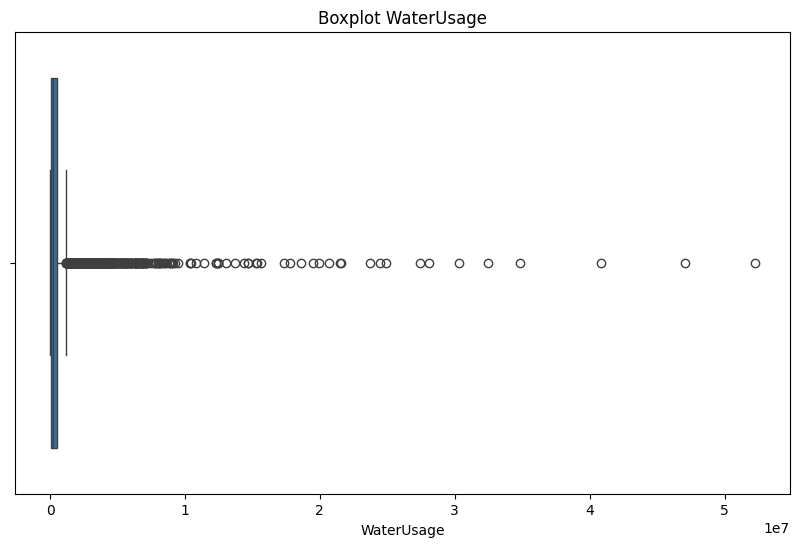

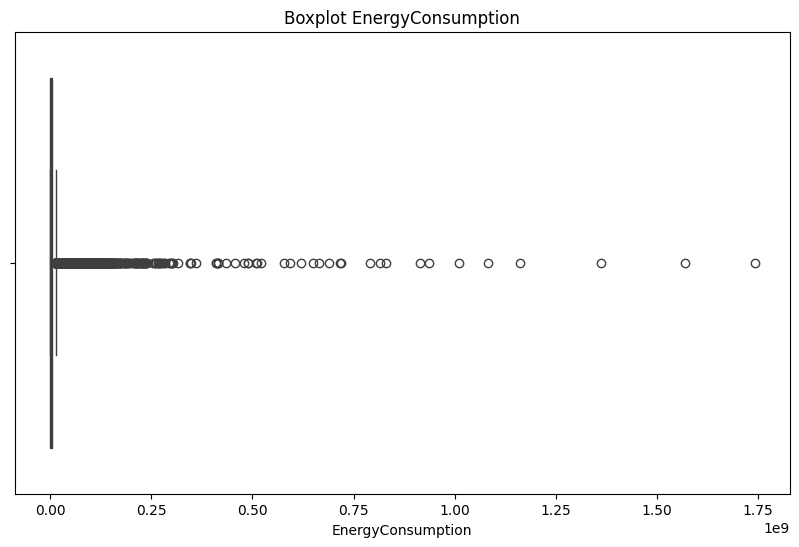

In [ ]:
# Cek outlier

import seaborn as sns
import matplotlib.pyplot as plt

# Ambil semua kolom numerik, kecuali ID
num_cols = df.select_dtypes(include=['float64', 'int64']).drop(['CompanyID', 'Year'], axis=1).columns

# Buat boxplot per kolom
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

In [ ]:
#@title Preprocessing data

import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

# Salin dataset
df_outlier = df.copy()

# 1. Log Transform untuk data skewed
log_cols = ['Revenue', 'MarketCap', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']

for col in log_cols:
    df_outlier[col] = np.log1p(df_outlier[col])  # log1p aman untuk nol

# 2. Winsorization untuk ProfitMargin dan GrowthRate
winsor_cols = ['ProfitMargin', 'GrowthRate']

for col in winsor_cols:
    df_outlier[col] = winsorize(df_outlier[col], limits=[0.01, 0.01])

# 3. One-Hot Encoding untuk Industry dan Region
df_outlier = pd.get_dummies(df_outlier, columns=['Industry', 'Region'], drop_first=True)

# 4. Scaling semua fitur numerik
# Ambil semua kolom numerik, kecuali ID, Year, dan target ESG_Overall
num_features = df_outlier.select_dtypes(include=['float64', 'int64']).drop(['CompanyID', 'Year', 'ESG_Overall'], axis=1).columns

scaler = StandardScaler()
df_outlier[num_features] = scaler.fit_transform(df_outlier[num_features])

# Dataset sudah siap digunakan
df_ready = df_outlier.copy()

In [ ]:
from sklearn.model_selection import train_test_split

# Drop semua kolom non-numerik DAN kolom pembentuk target
X = df_ready.drop(['CompanyID', 'CompanyName', 'Year',
                   'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance'], axis=1)

y = df_ready['ESG_Overall']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Buat model baseline
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi data test
y_pred = model.predict(X_test)

# Evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

MAE: 5.945989090909093
MSE: 63.9026102018182
R²: 0.729268220392906


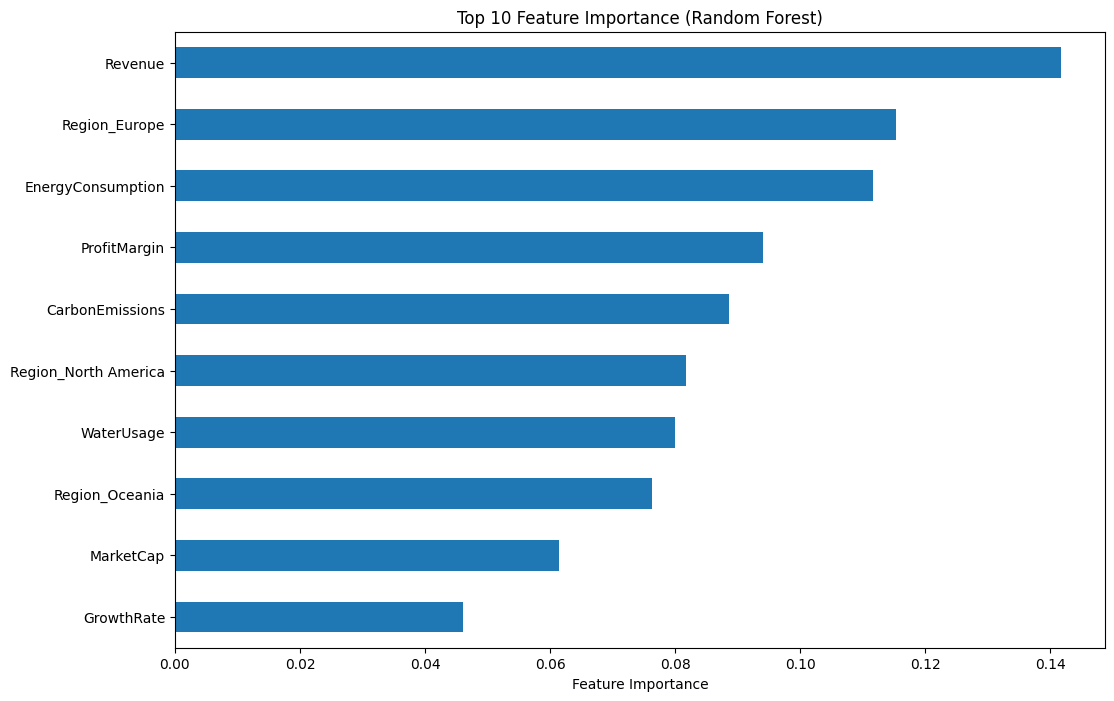

In [ ]:
#@title Feature Importance

import pandas as pd
import matplotlib.pyplot as plt

# Ambil feature importance dari model
importances = model.feature_importances_
feature_names = X.columns

# Urutkan dan buat DataFrame
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 8))
feat_importances.head(10).plot(kind='barh')
plt.gca().invert_yaxis()  # Fitur terpenting di atas
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.show()

In [ ]:
#@title XGBoost
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Inisialisasi dan Training Model
xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# 2. Prediksi
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Evaluasi Model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost MAE: {mae_xgb:.4f}')
print(f'XGBoost MSE: {mse_xgb:.4f}')
print(f'XGBoost R²: {r2_xgb:.4f}')

XGBoost MAE: 7.1236
XGBoost MSE: 81.5208
XGBoost R²: 0.6546


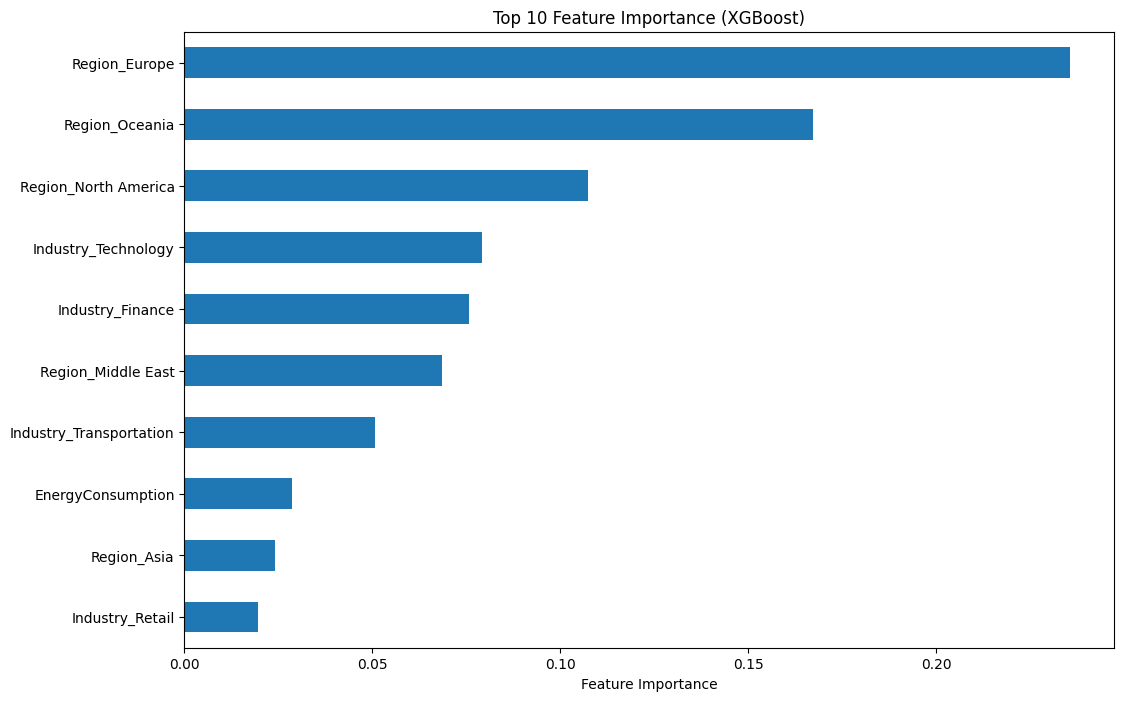

In [ ]:
# Feature Importance - XGBoost

import pandas as pd

importances = xgb_model.feature_importances_
feature_names = X_train.columns

feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feat_importances.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance (XGBoost)')
plt.show()